# project title:-  LOAN ELIGIBLITY PREDICTION

# problem staements

This is a classification problem in which we need to classify whether the loan will be approved or not.                 
Loan status can have two values: Yes or NO.                         
Yes: if the loan is approved         
No: if the loan is not approved 

# The dataset consists of the following variables:          
           
Loan_ID : Unique Loan ID         
Gender : Male/ Female            
Married : Applicant married (Y/N)           
Dependents : Number of dependents
Education : Applicant Education (Graduate/ Under Graduate)               
Self_Employed : Self employed (Y/N)                
ApplicantIncome : Applicant income              
CoapplicantIncome : Coapplicant income                        
LoanAmount : Loan amount in thousands of dollars            
Loan_Amount_Term : Term of loan in months                   
Credit_History : credit history meets guidelines yes or no                 
Property_Area : Urban/ Semi Urban/ Rural                         
Loan_Status : Loan approved (Y/N) this is the target variable                                        


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ( 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report,
    precision_score,
    recall_score
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/Ajay/OneDrive/Desktop/Loan Dataset.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

# find missing value ,fill or drop

In [4]:
data.isnull().sum()                     #find null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data=data.drop("Loan_ID",axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [7]:
data.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [8]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data["LoanAmount"].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [9]:
  #mode
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

# label encoding for categorical variable

In [11]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Married=le.fit_transform(data.Married)
data.Education=le.fit_transform(data.Education)
data.Self_Employed=le.fit_transform(data.Self_Employed)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)
data.Dependents.replace({"0":"0","1":"1","2":"2","3+":"3"},inplace=True)
data.Dependents=le.fit_transform(data.Dependents)

In [13]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# scatter plot

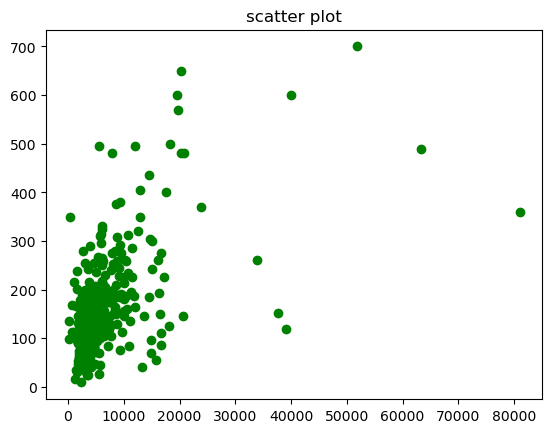

In [14]:
a=data["ApplicantIncome"]
b=data["LoanAmount"]
plt.title("scatter plot")
plt.scatter(a,b,color="Green")
plt.show()

In [15]:
#there is a positive correlation  between   ApplicantIncome AND loanAmount

# Pie chart

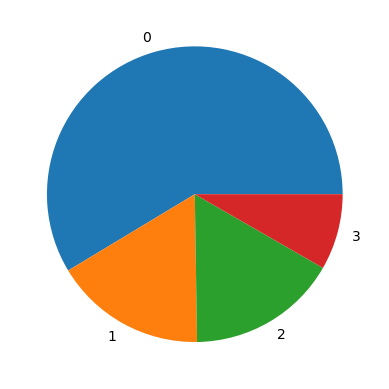

In [16]:
x=data["Dependents"].value_counts()
y=["0","1","2","3"]
plt.pie(x,labels=y)
plt.show()

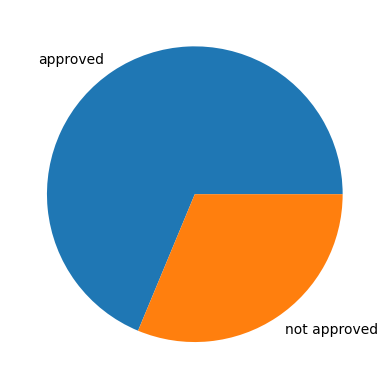

In [17]:
x=data["Loan_Status"].value_counts()
y=["approved","not approved"]
plt.pie(x,labels=y)
plt.show()

# count plot

In [23]:
sns.countplot("Loan_Status",data=data)
plt.show()

TypeError: countplot() got multiple values for argument 'data'

In [19]:
x=pd.crosstab(data["Credit_History"],data["Loan_Status"])
x

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


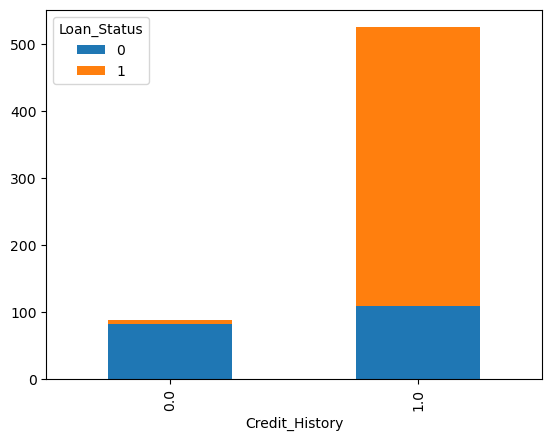

In [20]:
x.plot(kind="bar",stacked=True)
plt.show()

In [21]:
y=pd.crosstab(data["Gender"],data["Loan_Status"])
y

Loan_Status,0,1
Gender,,
0,37,75
1,155,347


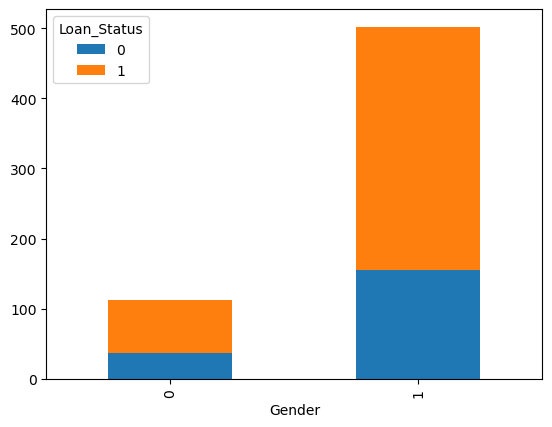

In [22]:
y.plot(kind="bar",stacked=True)
plt.show()

In [24]:
y=pd.crosstab(data["Dependents"],data["Loan_Status"])
y

Loan_Status,0,1
Dependents,,
0,113,247
1,36,66
2,25,76
3,18,33


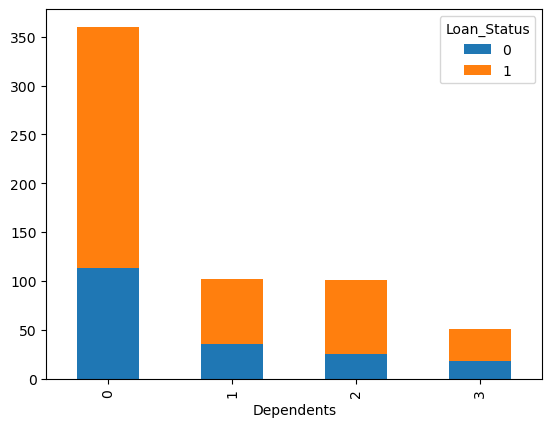

In [25]:
y.plot(kind="bar",stacked=True)
plt.show()

# Outliers treating

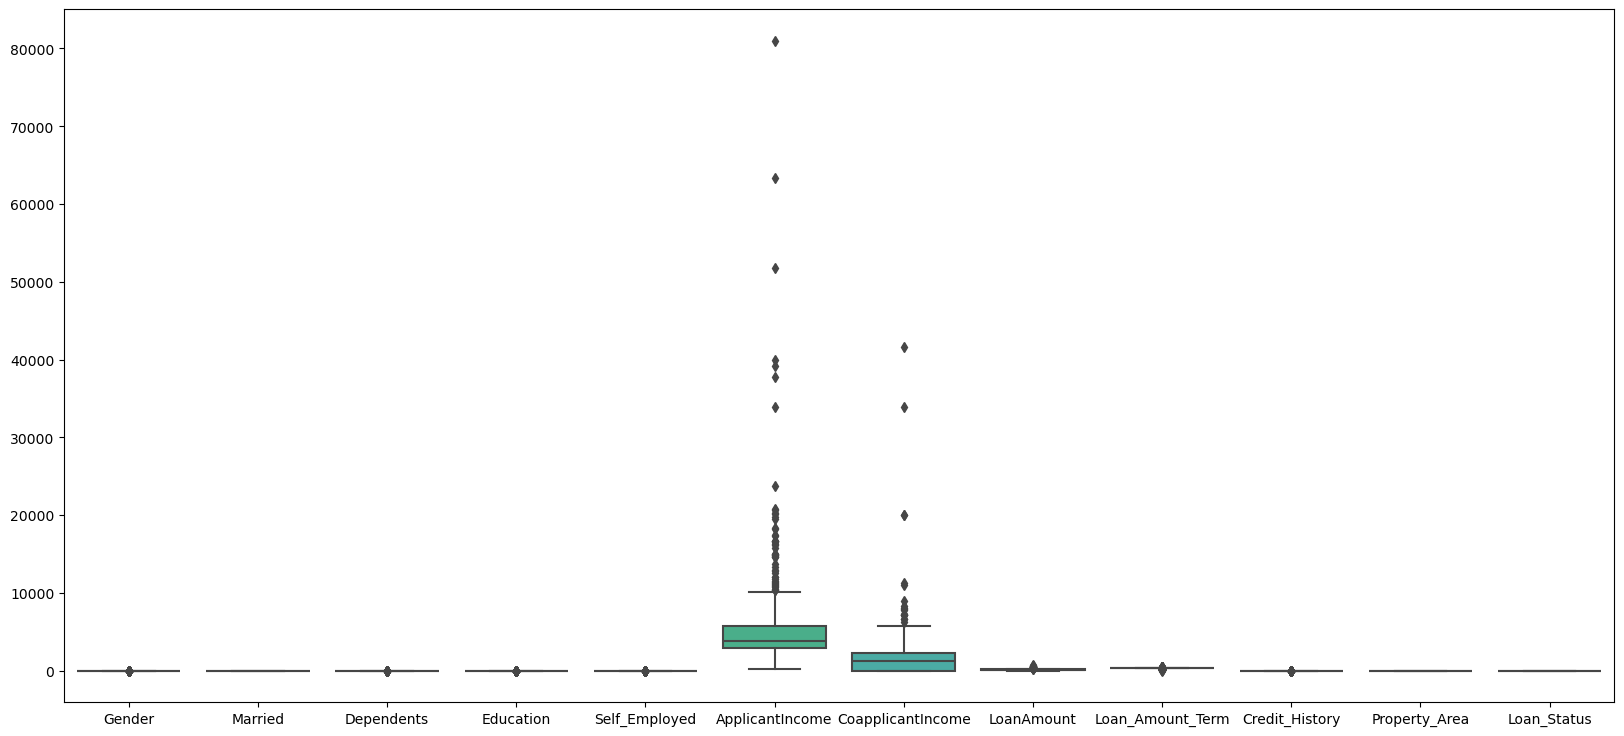

In [26]:
plt.figure(figsize=(20,9))
sns.boxplot(data=data)
plt.show()

 their is outlier in gender,education,self_Employed,ApplicantIncome,       
 CoapplicantIncome,LoanAmount,loan_Amount_Term,Credit_History         
 But Gender,Education,Self_Employed,LoanAmount_Term,Credit_History are the categorical variable         
 by boxplot or value counts function,so no need to do outlier treatment on that variable        
 Remaning columns are numeric - Applicantincome,Coapplicantincome,loan amount (need to do outlier treatment)

# outlier treatment for ApplicantIncome

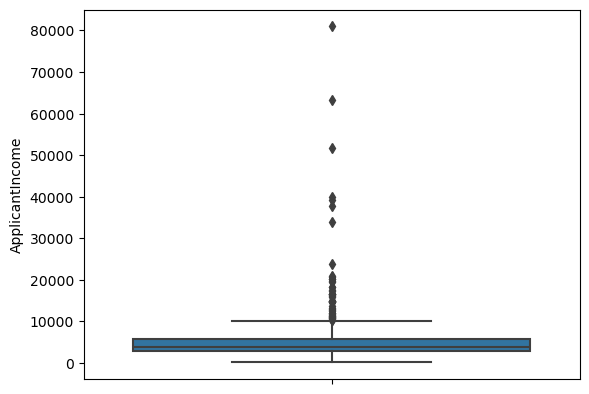

In [27]:
sns.boxplot(data=data,y="ApplicantIncome")
plt.show()

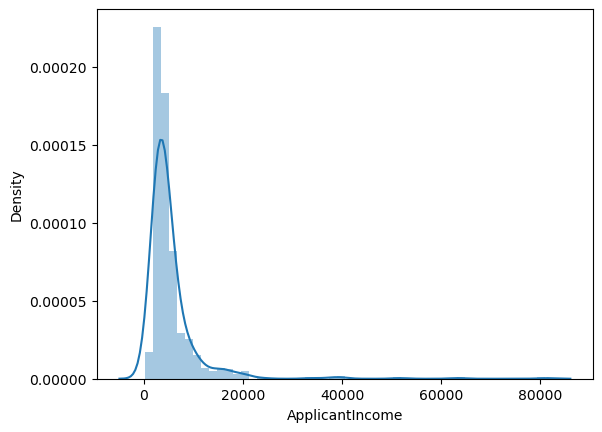

In [28]:
sns.distplot(data.ApplicantIncome)
plt.show()

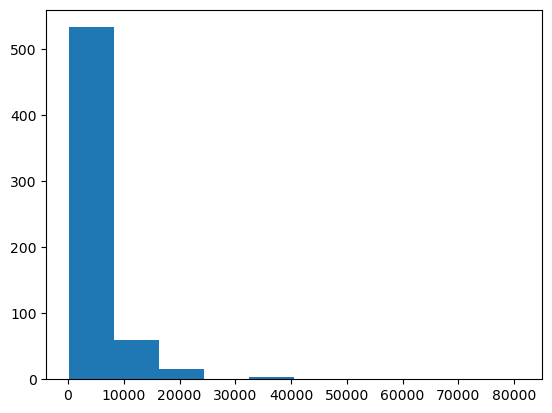

In [29]:
plt.hist(data.ApplicantIncome)
plt.show()

                                it is positive skewed 

In [30]:
data.ApplicantIncome.value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

   ApplicantIncome is numeric variable, and it is positive skewed so we use iqr method

In [31]:
iqr=data.ApplicantIncome.quantile(0.75)-data.ApplicantIncome.quantile(0.25)

In [32]:
ub=data.ApplicantIncome.quantile(0.75)+1.5*iqr
lb=data.ApplicantIncome.quantile(0.25)-1.5*iqr
print(lb,ub)

-1498.75 10171.25


In [33]:
data=data.loc[(data["ApplicantIncome"]<ub) & (data["ApplicantIncome"]>lb)]

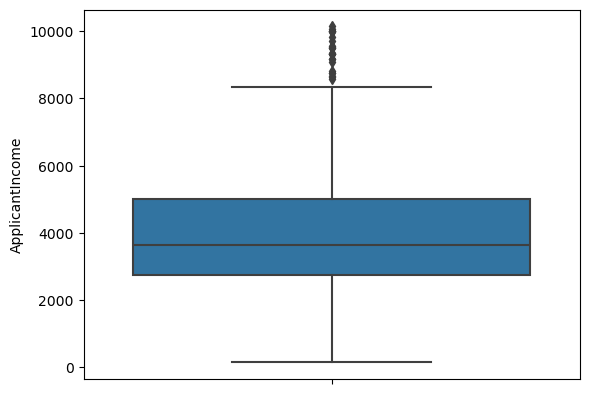

In [34]:
sns.boxplot(data=data,y="ApplicantIncome")
plt.show()

here, we can see that ourtilers of ApplicantIncome is preess to the upper bound.

# Coapplicantincome outliers treating

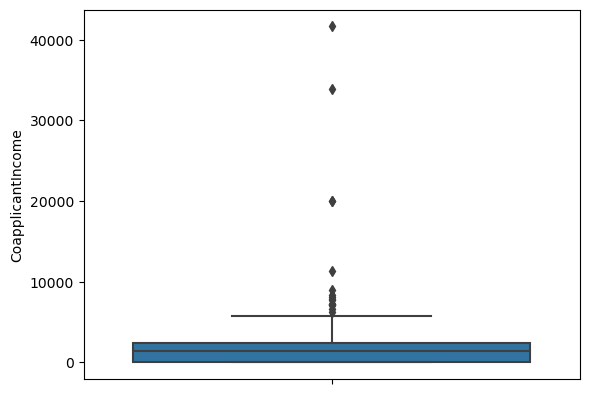

In [35]:
sns.boxplot(data=data,y="CoapplicantIncome")
plt.show()

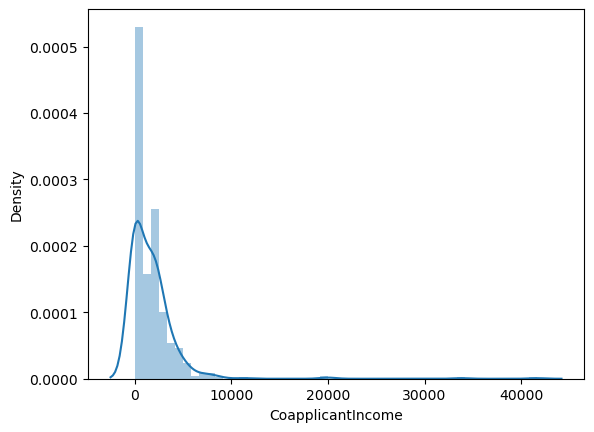

In [36]:
sns.distplot(data.CoapplicantIncome)
plt.show()

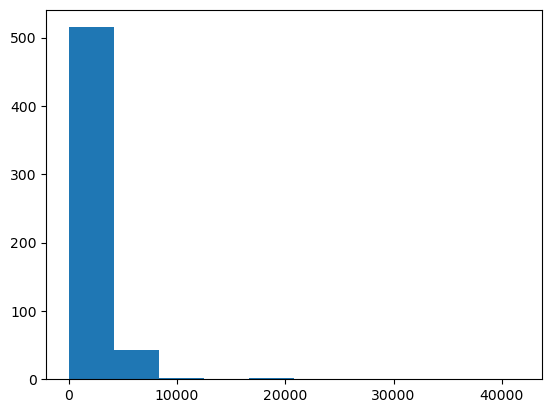

In [37]:
plt.hist(data.CoapplicantIncome)
plt.show()

it is also positively skewed so we use iqr method

In [38]:
iqr=data.CoapplicantIncome.quantile(0.75)-data.CoapplicantIncome.quantile(0.25)

In [39]:
ub=data.CoapplicantIncome.quantile(0.75)+1.5*iqr
lb=data.CoapplicantIncome.quantile(0.25)-1.5*iqr
print(lb,ub)

-3505.5 5842.5


In [40]:
data=data.loc[(data["CoapplicantIncome"]<ub) & (data["CoapplicantIncome"]>lb)]

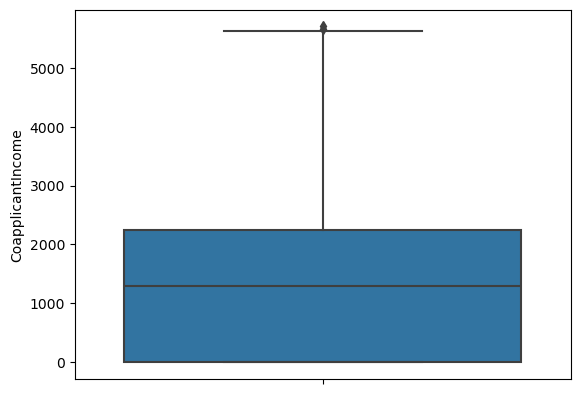

In [41]:
sns.boxplot(data=data,y="CoapplicantIncome")
plt.show()

# loan amount outlier treating

<Axes: ylabel='LoanAmount'>

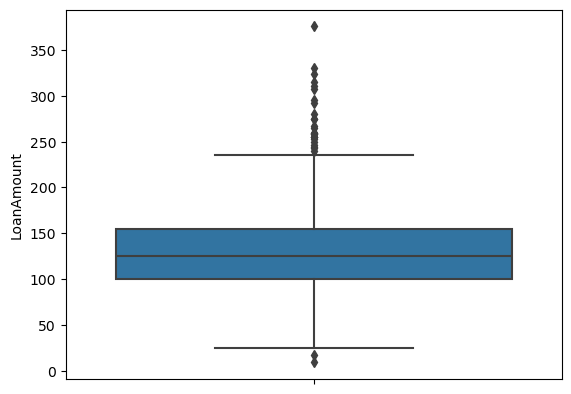

In [42]:
sns.boxplot(data=data,y="LoanAmount")

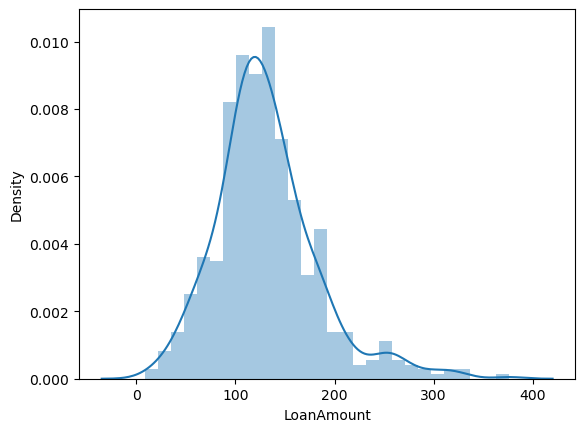

In [43]:
sns.distplot(data.LoanAmount)
plt.show()

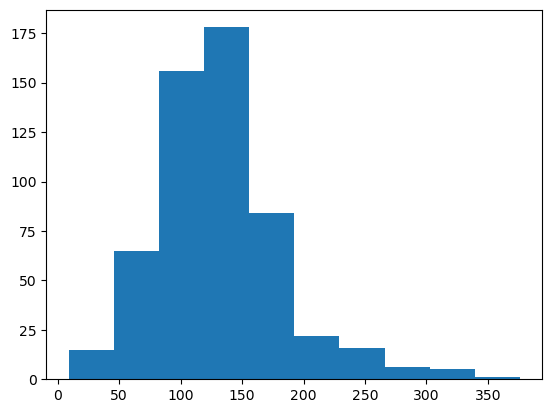

In [44]:
plt.hist(data.LoanAmount)
plt.show()

In [45]:
iqr=data.LoanAmount.quantile(0.75)-data.LoanAmount.quantile(0.25)

In [46]:
ub=data.LoanAmount.quantile(0.75)+1.5*iqr
lb=data.LoanAmount.quantile(0.25)-1.5*iqr
print(lb,ub)

17.5 237.5


In [47]:
data=data.loc[(data["LoanAmount"]<ub) & (data["LoanAmount"]>lb)]

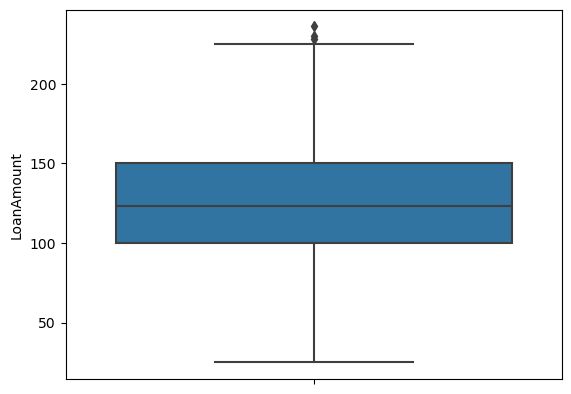

In [48]:
sns.boxplot(data=data,y="LoanAmount")
plt.show()

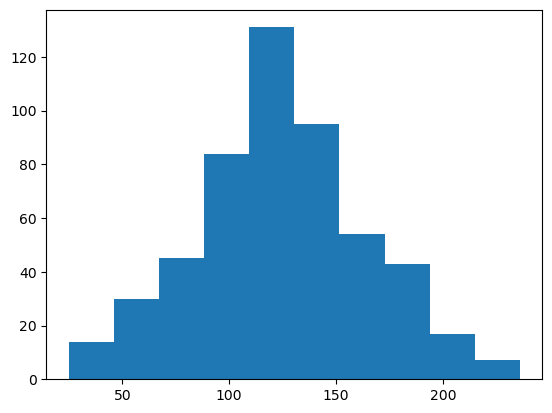

In [49]:
plt.hist(data.LoanAmount)
plt.show()

 here,all outliers are treated

# Machine learning

In [50]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [51]:
x=data.drop(["Loan_Status"],axis=1) #regressor,independent
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [52]:
y=data["Loan_Status"]    #response ,target,dependent variable
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 520, dtype: int32

# split data 20% for test and 80% to train

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((416, 11), (104, 11), (416,), (104,))

# 1.logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression 

In [57]:
lg=LogisticRegression()

In [58]:
lg.fit(x_train,y_train)

LogisticRegression()

In [59]:
lg_p=lg.predict(x_test)
lg_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(lg_p,y_test)
cm

array([[14,  0],
       [14, 76]], dtype=int64)

In [61]:
#accuracy :how often model predict correct output
#its ratio of how model is correct prediction made by classifier to the Number of PREDICTION MADE BY CLASSIFIER 
#C.P/T.P

In [62]:
lg_acc=(cm.diagonal().sum()/cm.sum())*100
lg_acc

86.53846153846155

In [63]:
lg_pre=precision_score(lg_p,y_test)           # #exact clasified
lg_pre

1.0

In [64]:
lg_re=recall_score(lg_p,y_test)               #complete classified
lg_re

0.8444444444444444

In [65]:
from sklearn.metrics import classification_report
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        14
           1       1.00      0.84      0.92        90

    accuracy                           0.87       104
   macro avg       0.75      0.92      0.79       104
weighted avg       0.93      0.87      0.88       104



here 87% accuracy

# 2.decision tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [67]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
dt_p=dt.predict(x_test)

In [69]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[14, 13],
       [14, 63]], dtype=int64)

In [70]:
dt_ac=(dt_cf.diagonal().sum()/dt_cf.sum())*100
dt_ac

74.03846153846155

In [71]:
dt_pr=precision_score(dt_p,y_test)      #exact clasified
dt_pr

0.8289473684210527

In [72]:
dt_re=recall_score(dt_p,y_test)      #exact clasified
dt_re

0.8181818181818182

In [73]:
from sklearn.metrics import classification_report
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        27
           1       0.83      0.82      0.82        77

    accuracy                           0.74       104
   macro avg       0.66      0.67      0.67       104
weighted avg       0.74      0.74      0.74       104



  here 62% accuracy

# feature selection:-it is part of decision tree

In [74]:
dt.feature_importances_

array([0.00745921, 0.00764569, 0.05343673, 0.0427329 , 0.01133091,
       0.18015956, 0.09868411, 0.17252346, 0.07670931, 0.30721542,
       0.0421027 ])

In [75]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importance,columns
0,0.007459,Gender
1,0.007646,Married
2,0.053437,Dependents
3,0.042733,Education
4,0.011331,Self_Employed
5,0.180160,ApplicantIncome
6,0.098684,CoapplicantIncome
7,0.172523,LoanAmount
8,0.076709,Loan_Amount_Term
9,0.307215,Credit_History


here,we can see that Loan Amount is imporatant variables after that Credit history,Applicantincome,coapplicantincome is important variables

# 3.Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [77]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
rf_p=rf.predict(x_test)

In [79]:
cf=confusion_matrix(rf_p,y_test)
cf

array([[15,  5],
       [13, 71]], dtype=int64)

In [80]:
rf_acc=cf.diagonal().sum()/cf.sum()*100
rf_acc

82.6923076923077

In [81]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.9342105263157895

In [82]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.8452380952380952

In [83]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        20
           1       0.93      0.85      0.89        84

    accuracy                           0.83       104
   macro avg       0.73      0.80      0.76       104
weighted avg       0.86      0.83      0.84       104



it is show 67% accuracy

 # 4.KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=22)

In [85]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [86]:
k_p=knn.predict(x_test)

In [87]:
ck=confusion_matrix(k_p,y_test)
ck

array([[ 1,  3],
       [27, 73]], dtype=int64)

In [88]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

71.15384615384616

In [89]:
k_pr=precision_score(k_p,y_test)
k_pr

0.9605263157894737

In [90]:
k_re=recall_score(k_p,y_test)
k_re

0.73

In [91]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.04      0.25      0.06         4
           1       0.96      0.73      0.83       100

    accuracy                           0.71       104
   macro avg       0.50      0.49      0.45       104
weighted avg       0.92      0.71      0.80       104



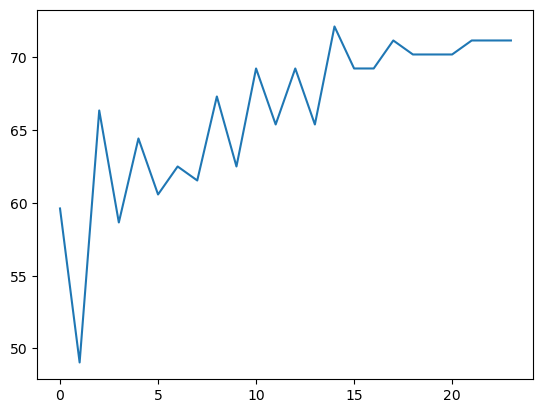

In [92]:
lst=list()
for i in range (1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)
    
import matplotlib.pyplot as plt
p=plt.plot(lst)

it show 62% accuracy

# 5. SVM

In [93]:
from sklearn.svm import SVC
svc=SVC()

In [94]:
svc.fit(x_train,y_train)

SVC()

In [95]:
s_p=svc.predict(x_test)
s_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
cs=confusion_matrix(s_p,y_test)
cs

array([[ 0,  0],
       [28, 76]], dtype=int64)

In [97]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

73.07692307692307

In [98]:
s_pr=precision_score(s_p,y_test)
s_pr

1.0

In [99]:

s_re=recall_score(s_p,y_test)
s_re

0.7307692307692307

In [100]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.73      0.84       104

    accuracy                           0.73       104
   macro avg       0.50      0.37      0.42       104
weighted avg       1.00      0.73      0.84       104



it show 61% accuracy

# 6.gaussian Navie bays

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
nb = GaussianNB()

In [103]:
nb_f=nb.fit(x_train,y_train)

In [104]:
nb_p=nb.predict(x_test)

In [105]:
cf=confusion_matrix(nb_p,y_test)
cf

array([[14,  0],
       [14, 76]], dtype=int64)

In [106]:
acc_nb=(cf.diagonal().sum()/cf.sum())*100
acc_nb

86.53846153846155

In [107]:
pre_nb=precision_score(nb_p,y_test)
pre_nb

1.0

In [108]:
re_nb=recall_score(nb_p,y_test)
re_nb

0.8444444444444444

In [109]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        14
           1       1.00      0.84      0.92        90

    accuracy                           0.87       104
   macro avg       0.75      0.92      0.79       104
weighted avg       0.93      0.87      0.88       104



# 7.Adaboost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [158]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [159]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [160]:
ad_p=adbo.predict(x_test)
ad_p

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [161]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[15, 17],
       [13, 59]], dtype=int64)

In [162]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

71.15384615384616

In [163]:
ad_pre=precision_score(ad_p,y_test)
ad_pre

0.7763157894736842

In [164]:
ad_re=recall_score(ad_p,y_test)
ad_re

0.8194444444444444

In [165]:
ad_fc=f1_score(ad_p,y_test)
ad_fc

0.7972972972972973

In [166]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50        32
           1       0.78      0.82      0.80        72

    accuracy                           0.71       104
   macro avg       0.66      0.64      0.65       104
weighted avg       0.70      0.71      0.71       104



# 8.XGBOOST CLASSIFIER 

In [167]:
!pip install xgboost
from xgboost import XGBRFClassifier
xgb=XGBRFClassifier()

In [168]:
xgb.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [169]:
xgb_p=xgb.predict(x_test)

In [170]:
xgb_cf=confusion_matrix(xgb_p,y_test)
ad_cf

array([[15, 17],
       [13, 59]], dtype=int64)

In [171]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

85.57692307692307

In [172]:
xgb_pre=precision_score(xgb_p,y_test)
xgb_pre

0.9868421052631579

In [173]:
xgb_re=recall_score(xgb_p,y_test)
xgb_re

0.8426966292134831

In [174]:
xgb_fc=f1_score(xgb_p,y_test)
xgb_fc

0.9090909090909091

In [175]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.50      0.93      0.65        15
           1       0.99      0.84      0.91        89

    accuracy                           0.86       104
   macro avg       0.74      0.89      0.78       104
weighted avg       0.92      0.86      0.87       104



# 9.BaggingClassifier
The Bagging Classifier is a powerful tool for reducing variance and avoiding overfitting, particularly useful with high variance algorithms like decision trees. By training multiple models on different subsets of the data and combining their predictions, bagging can provide more robust and stable prediction

In [176]:
from sklearn.ensemble import BaggingClassifier

In [177]:
base_estimator = DecisionTreeClassifier()
bg= BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [178]:
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [179]:
bg_p=bg.predict(x_test)

In [180]:
bg_cf=confusion_matrix(bg_p,y_test)
bg_cf

array([[15,  7],
       [13, 69]], dtype=int64)

In [181]:
bg_acc=(bg_cf.diagonal().sum()/bg_cf.sum())*100
bg_acc

80.76923076923077

In [182]:
bg_pre=precision_score(bg_p,y_test)
bg_pre

0.9078947368421053

In [183]:
bg_re=recall_score(bg_p,y_test)
bg_re

0.8414634146341463

In [184]:
bg_fc=f1_score(bg_p,y_test)
bg_fc

0.8734177215189874

In [185]:
print(classification_report(bg_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.68      0.60        22
           1       0.91      0.84      0.87        82

    accuracy                           0.81       104
   macro avg       0.72      0.76      0.74       104
weighted avg       0.83      0.81      0.82       104



it show 81% accuracy

# 10.GradientBoostingClassifier

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
gb= GradientBoostingClassifier(random_state=42)

In [188]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [189]:
gb_p=gb.predict(x_test)

In [190]:
gb_cf=confusion_matrix(gb_p,y_test)
gb_cf

array([[15,  3],
       [13, 73]], dtype=int64)

In [191]:
gb_acc=gb_cf.diagonal().sum()/gb_cf.sum()*100
gb_acc

84.61538461538461

In [192]:
gb_pre=precision_score(gb_p,y_test)
gb_pre

0.9605263157894737

In [193]:
gb_re=recall_score(gb_p,y_test)
gb_re

0.8488372093023255

In [194]:
gb_fc=f1_score(gb_p,y_test)
gb_fc

0.9012345679012346

In [195]:
print(classification_report(gb_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.83      0.65        18
           1       0.96      0.85      0.90        86

    accuracy                           0.85       104
   macro avg       0.75      0.84      0.78       104
weighted avg       0.89      0.85      0.86       104



it show 85% accuracy

# MAKE DATAFRAME FOR COMPARE RESULT

In [418]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","Guassian naeive bays","Adaboost","XGBOOST CLASSIFIER","BaggingClassifier","GradientBoostingClassifier"]
list2=[lg_acc,dt_ac,rf_acc,kacc,acc_s,acc_nb,ad_acc,xgb_acc,bg_acc,gb_acc]
list3=[lg_pre,dt_pr,rf_pr,k_pr,s_pr,pre_nb,ad_pre,xgb_pre,bg_pre,gb_pre]
list4=[lg_re,dt_re,rf_re,k_re,s_re,re_nb,ad_re,xgb_re,bg_re,gb_re]

In [419]:
df=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4})
df

,Model Name,Accuracy,Precision,Recall
0,LOGISTIC REGRESSION,86.538462,1.000000,0.844444
1,DECISION TREE,74.038462,0.828947,0.818182
2,RANDOM FOREST,82.692308,0.934211,0.845238
3,KNN,71.153846,0.960526,0.730000
4,SVM,73.076923,1.000000,0.730769
5,Guassian naeive bays,86.538462,1.000000,0.844444
6,Adaboost,71.153846,0.776316,0.819444
7,XGBOOST CLASSIFIER,85.576923,0.986842,0.842697
8,BaggingClassifier,80.769231,0.907895,0.841463
9,GradientBoostingClassifier,84.615385,0.960526,0.848837


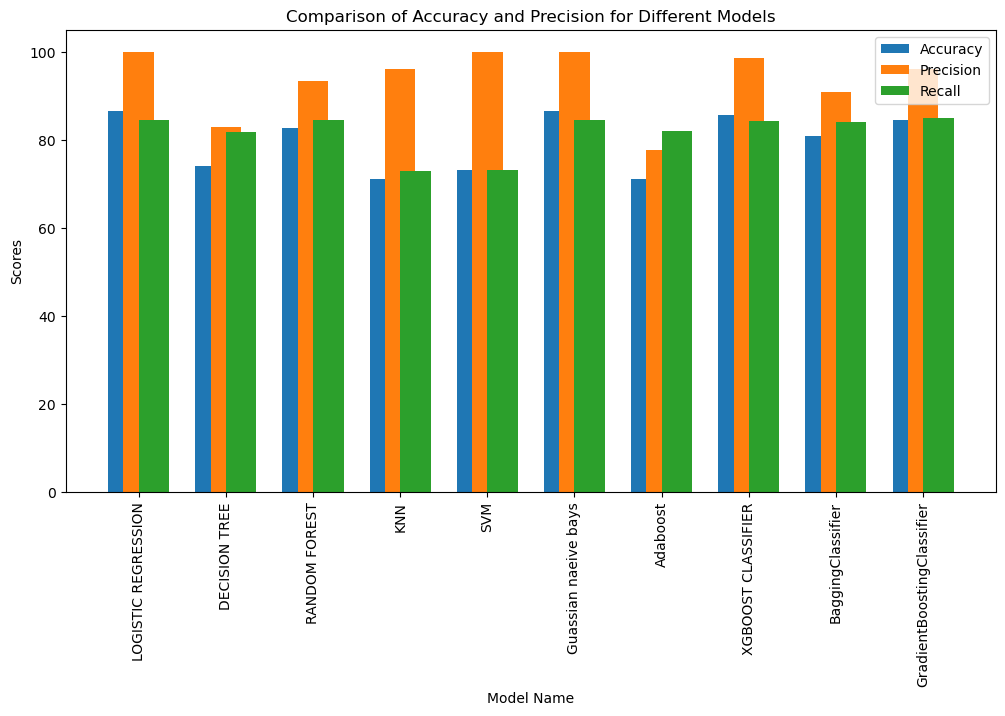

In [369]:
# Create an array for the x-axis positions
df['Accuracy']=df['Accuracy']
df['Precision']=df['Precision']*100
df['Recall']=df['Recall']*100
x = np.arange(len(df))
#to increase figure size
plt.figure(figsize=(12, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x , df['Precision'], width=bar_width, label='Precision')
plt.bar(x + bar_width/2, df['Recall'], width=bar_width, label='Recall')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy and Precision for Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

 INTERPRETATION:- from above dataframe, logistic regression and Guassian naeive bays gives more good results
 i.e logistic regression having 86.53% accuracy with 85% precision and 69% precision
 and naive bayes gives 68.29% accuracy with 82% precision and 70% recall.
 hence, we can say our data is underfitted 
 we are not satisfited with our result, it giving very low results maybe coz of data imbalance problem,
To takle this problem we go for oversampling.

# RandomOverSampling

In [199]:
data.Loan_Status.value_counts()

Loan_Status
1    362
0    158
Name: count, dtype: int64

In [200]:
c_1,c_0=data["Loan_Status"].value_counts()
c_1,c_0

(362, 158)

In [201]:
train_0=data[data["Loan_Status"]==0]
train_1=data[data["Loan_Status"]==1]

In [202]:
train_0.shape,train_1.shape

((158, 12), (362, 12))

In [203]:
class_0over=train_0.sample(c_1,replace=True)

In [204]:
class0_1=pd.concat([class_0over,train_1],axis=0)

In [205]:
class0_1.shape

(724, 12)

In [206]:
class0_1.Loan_Status.value_counts()

Loan_Status
0    362
1    362
Name: count, dtype: int64

In [207]:
o_x=class0_1.iloc[:,1:-1]
o_y=class0_1.iloc[:,-1]

In [208]:
o_x_train,o_x_test,o_y_train,o_y_test=train_test_split(o_x,o_y,test_size=0.2,random_state=100)
o_x_train.shape,o_x_test.shape,o_y_train.shape,o_y_test.shape

((579, 10), (145, 10), (579,), (145,))

# 1.Logistic Reg with Random Oversampling

In [209]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(o_x_train,o_y_train)

LogisticRegression()

In [210]:
lg_p=lg.predict(o_x_test)

In [211]:
lg_cf=confusion_matrix(lg_p,o_y_test)
lg_cf

array([[40, 12],
       [36, 57]], dtype=int64)

In [212]:
lg_acc1=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_acc1

66.89655172413794

In [213]:
lg_pre1=precision_score(lg_p,o_y_test)
lg_pre1

0.8260869565217391

In [214]:
lg_re1=recall_score(lg_p,o_y_test)
lg_re1

0.6129032258064516

In [215]:
lg_fc1=f1_score(lg_p,o_y_test)
lg_fc1

0.7037037037037037

In [216]:
print(classification_report(lg_p,o_y_test))

              precision    recall  f1-score   support

           0       0.53      0.77      0.62        52
           1       0.83      0.61      0.70        93

    accuracy                           0.67       145
   macro avg       0.68      0.69      0.66       145
weighted avg       0.72      0.67      0.68       145



it show 69% accuracy

# GridSearchCv logistics

In [217]:
from sklearn.model_selection import GridSearchCV
pg= {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}
gsm3=GridSearchCV(estimator=lg,param_grid=pg,cv=100,verbose=3,scoring='accuracy',n_jobs=-1)
gsm3.fit(o_x_train,o_y_train)

Fitting 100 folds for each of 12 candidates, totalling 1200 fits


GridSearchCV(cv=100, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [218]:
y3_predict=gsm3.predict(o_x_test)

In [219]:
A1=lg_grd_accuracy=accuracy_score(o_y_test,y3_predict)
P1=lg_grd_precision=precision_score(o_y_test,y3_predict)
R1=lg_grd_recall=recall_score(o_y_test,y3_predict)
print(A1)
print(P1)
print(R1)

0.6689655172413793
0.6129032258064516
0.8260869565217391


# 2.decision tree

In [220]:
dt.fit(o_x_train,o_y_train)

DecisionTreeClassifier()

In [221]:
dt_op=dt.predict(o_x_test)

In [222]:
dt_cf=confusion_matrix(dt_op,o_y_test)
dt_cf

array([[68, 14],
       [ 8, 55]], dtype=int64)

In [223]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

84.82758620689656

In [224]:
dt_pre1=precision_score(dt_op,o_y_test)
dt_pre1

0.7971014492753623

In [225]:
dt_re1=recall_score(dt_op,o_y_test)
dt_re1

0.873015873015873

In [226]:
dt_fc1=f1_score(dt_op,o_y_test)
dt_fc1

0.8333333333333334

In [227]:
print(classification_report(dt_op,o_y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.80      0.87      0.83        63

    accuracy                           0.85       145
   macro avg       0.85      0.85      0.85       145
weighted avg       0.85      0.85      0.85       145



it show 80% accuracy

# Gridsearchcv Decision Tree

In [228]:
pg={'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
gsm2=GridSearchCV(estimator=dt,param_grid=pg,cv=100,verbose=3,scoring='accuracy',n_jobs=-1)
gsm2.fit(o_x_train,o_y_train)

Fitting 100 folds for each of 108 candidates, totalling 10800 fits


GridSearchCV(cv=100, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=3)

In [229]:
y2_predict=gsm2.predict(o_x_test)

In [230]:
A2=dt_grt_accuracy=accuracy_score(o_y_test,y2_predict)
P2=dt_grt_precision=precision_score(o_y_test,y2_predict)
R2=dt_grt_recall=recall_score(o_y_test,y2_predict)
print(A2)
print(P2)
print(R2)

0.8551724137931035
0.875
0.8115942028985508


# 3.random forest

In [231]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [232]:
rf.fit(o_x_train,o_y_train)

RandomForestClassifier()

In [233]:
rf_p=rf.predict(o_x_test)

In [234]:
cf=confusion_matrix(rf_p,o_y_test)
cf

array([[68, 10],
       [ 8, 59]], dtype=int64)

In [235]:
rf_acc1=cf.diagonal().sum()/cf.sum()*100
rf_acc1

87.58620689655172

In [236]:
rf_pr1=precision_score(rf_p,o_y_test)
rf_pr1

0.855072463768116

In [237]:
rf_re1=recall_score(rf_p,o_y_test)
rf_re1

0.8805970149253731

In [238]:
rf_fc1=f1_score(rf_p,o_y_test)
rf_fc1

0.8676470588235295

In [239]:
print(classification_report(rf_p,o_y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        78
           1       0.86      0.88      0.87        67

    accuracy                           0.88       145
   macro avg       0.87      0.88      0.88       145
weighted avg       0.88      0.88      0.88       145



it show 88% accuracy

# Hyperparameter tuning (RANDOMISEDCV, GRIDSEARCHCV)

The main parameters used by a Random Forest Classifier are:          

criterion = the function used to evaluate the quality of a split.        
max_depth = maximum number of levels allowed in each tree.          
max_features = maximum number of features considered when splitting a node.        
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.       
min_samples_split = minimum number of samples necessary in a node to cause node splitting.      
n_estimators = number of trees in the ensamble.

# RANDOMIZEDSEARCHCV

In [244]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [245]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(o_x_train,o_y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [246]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'entropy'}

In [247]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [248]:
best_random_grid=rf_randomcv.best_estimator_

In [249]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(o_x_test)
print(confusion_matrix(o_y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(o_y_test,y_pred)))
print("Classification report: {}".format(classification_report(o_y_test,y_pred)))

[[68  8]
 [10 59]]
Accuracy Score 0.8758620689655172
Classification report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88        76
           1       0.88      0.86      0.87        69

    accuracy                           0.88       145
   macro avg       0.88      0.87      0.88       145
weighted avg       0.88      0.88      0.88       145



From RandomSearchCV, We have got 88% accuracy , we go for gridsearch for better result.

# GridSearch CV for Random forest

In [250]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'entropy'}

In [255]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [560], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1600, 1700, 1800, 1900, 2000]}


In [256]:
# Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(o_x_train,o_y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1600, 1700, 1800, 1900, 2000]},
             verbose=2)

In [262]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       n_estimators=1700)

In [263]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       n_estimators=1700)

In [264]:
y_pred=best_grid.predict(o_x_test)
cf_grd=confusion_matrix(o_y_test,y_pred)
cf_grd

array([[68,  8],
       [10, 59]], dtype=int64)

In [265]:
A3=accuracy_score(o_y_test,y_pred)
A3

0.8758620689655172

In [266]:
P3=precision_score(o_y_test,y_pred)
P3

0.8805970149253731

In [267]:
R3=recall_score(o_y_test,y_pred)
R3

0.855072463768116

In [268]:
grd_fc=f1_score(o_y_test,y_pred)
grd_fc

0.8676470588235295

In [269]:
print(classification_report(o_y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        76
           1       0.88      0.86      0.87        69

    accuracy                           0.88       145
   macro avg       0.88      0.87      0.88       145
weighted avg       0.88      0.88      0.88       145



it show 84% accuracy

# 4.KNN

In [270]:
from sklearn.neighbors import KNeighborsClassifier

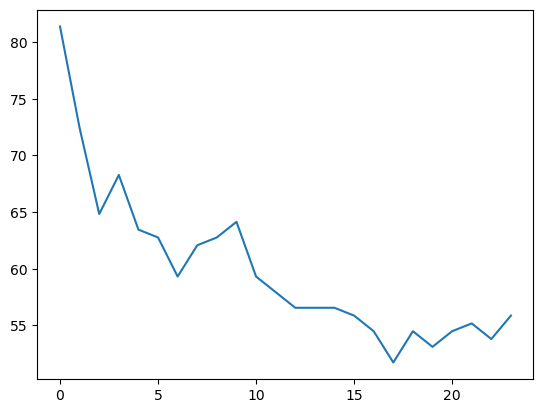

In [271]:
lst=list()
for i in range (1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(o_x_train,o_y_train)
    kn_pred=knn.predict(o_x_test)
    cf_k=confusion_matrix(kn_pred,o_y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)
    
import matplotlib.pyplot as plt
p=plt.plot(lst)

In [272]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(o_x_train,o_y_train)

KNeighborsClassifier(n_neighbors=2)

In [273]:
k_p=knn.predict(o_x_test)

In [274]:
ck=confusion_matrix(k_p,o_y_test)
ck

array([[67, 31],
       [ 9, 38]], dtype=int64)

In [275]:
kacc1=ck.diagonal().sum()/ck.sum()*100
kacc1

72.41379310344827

In [276]:
k_pr1=precision_score(k_p,o_y_test)
k_pr1

0.5507246376811594

In [277]:
k_re1=recall_score(k_p,o_y_test)
k_re1

0.8085106382978723

In [278]:
k_fc1=f1_score(k_p,o_y_test)
k_fc1

0.6551724137931035

In [279]:
print(classification_report(k_p,o_y_test))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        98
           1       0.55      0.81      0.66        47

    accuracy                           0.72       145
   macro avg       0.72      0.75      0.71       145
weighted avg       0.77      0.72      0.73       145



 it show 70% accuracy

# GridSearch CV 

In [280]:
from sklearn.model_selection import GridSearchCV
pg = {'n_neighbors': [3, 5, 7, 9]}
gsm1=GridSearchCV(estimator=knn,param_grid=pg,cv=200,verbose=3,scoring='accuracy',n_jobs=-1)
gsm1.fit(o_x_train,o_y_train)

Fitting 200 folds for each of 4 candidates, totalling 800 fits


GridSearchCV(cv=200, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy',
             verbose=3)

In [281]:
y1_predict=gsm1.predict(o_x_test)

In [282]:
A4=knn_grd_accuracy=accuracy_score(o_y_test,y1_predict)
P4=knn_grd_precision=precision_score(o_y_test,y1_predict)
R4=knn_grd_recall=recall_score(o_y_test,y1_predict)
print(A4)
print(P4)
print(R4)

0.6482758620689655
0.6216216216216216
0.6666666666666666


# 5. SVM

In [283]:
from sklearn.svm import SVC
svc=SVC()

In [284]:
svc.fit(o_x_train,o_y_train)

SVC()

In [285]:
s_p=svc.predict(o_x_test)
s_p

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [286]:
cs=confusion_matrix(s_p,o_y_test)
cs

array([[42, 38],
       [34, 31]], dtype=int64)

In [287]:
acc_s1=(cs.diagonal().sum()/cs.sum())*100
acc_s1

50.3448275862069

In [288]:
s_pr1=precision_score(s_p,o_y_test)
s_pr1

0.4492753623188406

In [289]:
s_re1=recall_score(s_p,o_y_test)
s_re1

0.47692307692307695

In [290]:
s_fc1=f1_score(s_p,o_y_test)
s_fc1

0.4626865671641791

In [291]:
print(classification_report(s_p,o_y_test))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54        80
           1       0.45      0.48      0.46        65

    accuracy                           0.50       145
   macro avg       0.50      0.50      0.50       145
weighted avg       0.51      0.50      0.50       145



it show 54% accuracy

# 6.gaussian Navie bays

In [292]:
from sklearn.naive_bayes import GaussianNB

In [293]:
nb = GaussianNB()

In [294]:
nb_f=nb.fit(o_x_train,o_y_train)

In [295]:
nb_p=nb.predict(o_x_test)

In [296]:
cf=confusion_matrix(nb_p,o_y_test)
cf

array([[35,  2],
       [41, 67]], dtype=int64)

In [297]:
acc_nb1=(cf.diagonal().sum()/cf.sum())*100
acc_nb1

70.34482758620689

In [298]:
pre_nb1=precision_score(nb_p,o_y_test)
pre_nb1

0.9710144927536232

In [299]:
re_nb1=recall_score(nb_p,o_y_test)
re_nb1

0.6203703703703703

In [300]:
fc_nb1=f1_score(nb_p,o_y_test)
fc_nb1

0.7570621468926554

In [301]:
print(classification_report(nb_p,o_y_test))

              precision    recall  f1-score   support

           0       0.46      0.95      0.62        37
           1       0.97      0.62      0.76       108

    accuracy                           0.70       145
   macro avg       0.72      0.78      0.69       145
weighted avg       0.84      0.70      0.72       145



it show 71% accuracy

# Gridsearchcv navie bays

In [302]:
from sklearn.model_selection import GridSearchCV

In [303]:
par_G={'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]}
gsm=GridSearchCV(estimator=nb,param_grid=par_G,cv=100,verbose=2,n_jobs=-1)
gsm.fit(o_x_train,o_y_train)

Fitting 100 folds for each of 5 candidates, totalling 500 fits


GridSearchCV(cv=100, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             verbose=2)

In [304]:
y_predict=gsm.predict(o_x_test)

In [305]:
A5=nb_grt_accuracy=accuracy_score(o_y_test,y_predict)
P5=nb_grt_precision=precision_score(o_y_test,y_predict)
R5=nb_grt_recall=recall_score(o_y_test,y_predict)
print(A5)
print(P5)
print(R5)

0.7034482758620689
0.6203703703703703
0.9710144927536232


# 7.Adaboost

In [306]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [307]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [308]:
adbo.fit(o_x_train,o_y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [309]:
ad_p=adbo.predict(o_x_test)
ad_p

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [310]:
ad_cf=confusion_matrix(ad_p,o_y_test)
ad_cf

array([[69, 17],
       [ 7, 52]], dtype=int64)

In [311]:
ad_acc1=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc1

83.44827586206897

In [312]:
ad_pre1=precision_score(ad_p,o_y_test)
ad_pre1

0.7536231884057971

In [313]:
ad_re1=recall_score(ad_p,o_y_test)
ad_re1

0.8813559322033898

In [314]:
ad_fc1=f1_score(ad_p,o_y_test)
ad_fc1

0.8124999999999999

In [315]:
print(classification_report(ad_p,o_y_test))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        86
           1       0.75      0.88      0.81        59

    accuracy                           0.83       145
   macro avg       0.83      0.84      0.83       145
weighted avg       0.85      0.83      0.84       145



it show 84% accuracy

# 8.XGBOOST CLASSIFIER

In [316]:
!pip install xgboost
from xgboost import XGBRFClassifier
xgb=XGBRFClassifier()

In [317]:
xgb.fit(o_x_train,o_y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [318]:
xgb_p=xgb.predict(o_x_test)

In [319]:
xgb_cf1=confusion_matrix(xgb_p,o_y_test)
xgb_cf1

array([[57,  9],
       [19, 60]], dtype=int64)

In [320]:
xgb_acc1=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_acc1

80.6896551724138

In [321]:
xgb_pre1=precision_score(xgb_p,o_y_test)
xgb_pre1

0.8695652173913043

In [322]:
xgb_re1=recall_score(xgb_p,o_y_test)
xgb_re1

0.759493670886076

In [323]:
xgb_fc1=f1_score(xgb_p,o_y_test)
xgb_fc1

0.8108108108108109

In [324]:
print(classification_report(xgb_p,o_y_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        66
           1       0.87      0.76      0.81        79

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.82      0.81      0.81       145



it show 76% accuracy

# GRIDSEARCHCV FOR XGBOOST

In [325]:
pg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
gsXGB = GridSearchCV(estimator=xgb, param_grid=pg, cv=5, verbose=2, n_jobs=-1)
gsXGB.fit(o_x_train, o_y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             verbose=2)

In [326]:
print(f"Best Parameters: {gsXGB.best_params_}")

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [327]:
y8_predict=gsXGB.predict(o_x_test)

In [328]:
A6=gsXGB_accuracy=accuracy_score(o_y_test,y8_predict)
P6=gsXGB_precision=precision_score(o_y_test,y8_predict)
R6=gsXGB_recall=recall_score(o_y_test,y8_predict)
print(A6)
print(P6)
print(R6)

0.7517241379310344
0.6853932584269663
0.8840579710144928


# 9.BaggingClassifier
The Bagging Classifier is a powerful tool for reducing variance and avoiding overfitting, particularly useful with high variance algorithms like decision trees. By training multiple models on different subsets of the data and combining their predictions, bagging can provide more robust and stable predictions.

In [329]:
from sklearn.ensemble import BaggingClassifier

In [330]:
base_estimator = DecisionTreeClassifier()
bg= BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [331]:
bg.fit(o_x_train,o_y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [332]:
bg_p=bg.predict(o_x_test)

In [333]:
bg_cf=confusion_matrix(bg_p,o_y_test)
bg_cf

array([[70, 10],
       [ 6, 59]], dtype=int64)

In [334]:
bg_acc1=(bg_cf.diagonal().sum()/bg_cf.sum())*100
bg_acc1

88.96551724137932

In [335]:
bg_pre1=precision_score(bg_p,o_y_test)
bg_pre1

0.855072463768116

In [336]:
bg_re1=recall_score(bg_p,o_y_test)
bg_re1

0.9076923076923077

In [337]:
bg_fc1=f1_score(bg_p,o_y_test)
bg_fc1

0.8805970149253731

In [338]:
print(classification_report(bg_p,o_y_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        80
           1       0.86      0.91      0.88        65

    accuracy                           0.89       145
   macro avg       0.89      0.89      0.89       145
weighted avg       0.89      0.89      0.89       145



it show  85% accuracy

# Gridsearchcv Bagging

In [339]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}
gbg = GridSearchCV(estimator=bg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
gbg.fit(o_x_train, o_y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_estimators=50, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [340]:
print(f"Best Parameters: {gbg.best_params_}")

Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 50}


In [341]:
y5_predict=gbg.predict(o_x_test)

In [342]:
A7=bg_grt_accuracy=accuracy_score(o_y_test,y5_predict)
P7=bg_grt_precision=precision_score(o_y_test,y5_predict)
R7=bg_grt_recall=recall_score(o_y_test,y5_predict)
print(A7)
print(P7)
print(R7)

0.9103448275862069
0.8888888888888888
0.927536231884058


# 10.GradientBoostingClassifier

In [343]:
from sklearn.ensemble import GradientBoostingClassifier

In [344]:
gb= GradientBoostingClassifier(random_state=42)

In [345]:
gb.fit(o_x_train,o_y_train)

GradientBoostingClassifier(random_state=42)

In [346]:
gb_p=gb.predict(o_x_test)

In [347]:
gb_cf=confusion_matrix(gb_p,o_y_test)
gb_cf

array([[61,  8],
       [15, 61]], dtype=int64)

In [348]:
gb_acc1=gb_cf.diagonal().sum()/gb_cf.sum()*100
gb_acc1

84.13793103448276

In [349]:
gb_pre1=precision_score(gb_p,o_y_test)
gb_pre1

0.8840579710144928

In [350]:
gb_re1=recall_score(gb_p,o_y_test)
gb_re1

0.8026315789473685

In [351]:
gb_fc1=f1_score(gb_p,o_y_test)
gb_fc1

0.8413793103448277

In [352]:
print(classification_report(gb_p,o_y_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        69
           1       0.88      0.80      0.84        76

    accuracy                           0.84       145
   macro avg       0.84      0.84      0.84       145
weighted avg       0.85      0.84      0.84       145



it show 75% accuracy

# Gridsearchcv Gradient bossting

In [353]:
pg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
gs_bst = GridSearchCV(estimator=gb, param_grid=pg, cv=5, verbose=2, n_jobs=-1)
gs_bst.fit(o_x_train,o_y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             verbose=2)

In [354]:
print(f"Best Parameters: {gs_bst.best_params_}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}


In [355]:
Y7_predict=gs_bst.predict(o_x_test)

In [356]:
A8=gb_grt_accuracy=accuracy_score(o_y_test,Y7_predict)
P8=gb_grt_precision=precision_score(o_y_test,Y7_predict)
R8=gb_grt_recall=recall_score(o_y_test,Y7_predict)
print(A8)
print(P8)
print(R8)

0.903448275862069
0.8985507246376812
0.8985507246376812


# MAKE DATAFRAME FOR COMPARE RESULT

In [420]:
list6=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","Guassian naeive bays","Adaboost","XGboost","Bagging ","GradientBoosting"]
list7=[lg_acc1,dt_acc1,rf_acc1,kacc1,acc_s1,acc_nb1,ad_acc1,xgb_acc1,bg_acc1,gb_acc1]
list8=[lg_pre1,dt_pre1,rf_pr1,k_pr1,s_pr1,pre_nb1,ad_pre1,xgb_pre1,bg_pre1,gb_pre1]
list9=[lg_re1,dt_re1,rf_re1,k_re1,s_re1,re_nb1,ad_re1,xgb_re1,bg_re1,gb_re1]
list10=[lg_fc1,dt_fc1,rf_fc1,k_fc1,s_fc1,fc_nb1,ad_fc1,xgb_fc1,bg_fc1,gb_fc1]

In [421]:
df1=pd.DataFrame({"Model Name":list6,"Accuracy":list7,"Precision":list8,"Recall":list9,"F1 score":list10})
df1

,Model Name,Accuracy,Precision,Recall,F1 score
0,LOGISTIC REGRESSION,66.896552,0.826087,0.612903,0.703704
1,DECISION TREE,84.827586,0.797101,0.873016,0.833333
2,RANDOM FOREST,87.586207,0.855072,0.880597,0.867647
3,KNN,72.413793,0.550725,0.808511,0.655172
4,SVM,50.344828,0.449275,0.476923,0.462687
5,Guassian naeive bays,70.344828,0.971014,0.620370,0.757062
6,Adaboost,83.448276,0.753623,0.881356,0.812500
7,XGboost,80.689655,0.869565,0.759494,0.810811
8,Bagging,88.965517,0.855072,0.907692,0.880597
9,GradientBoosting,84.137931,0.884058,0.802632,0.841379


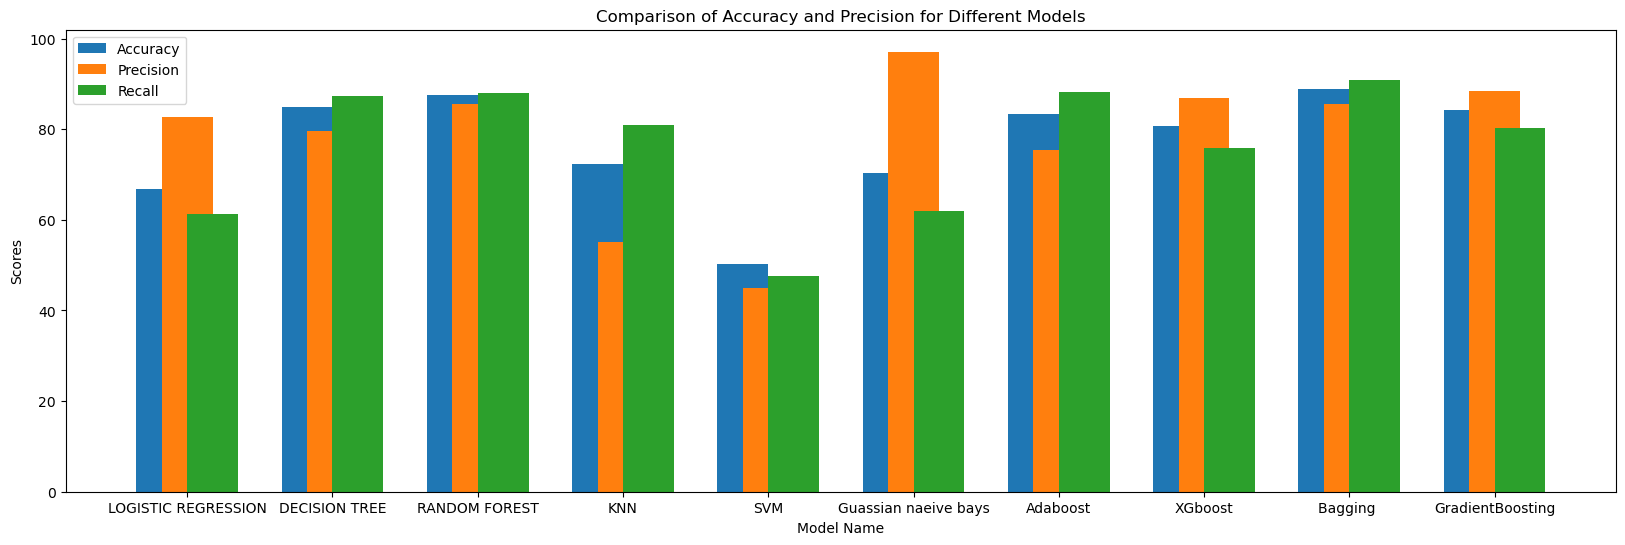

In [359]:
# Create an array for the x-axis positions
df1['Accuracy']=df1['Accuracy']
df1['Precision']=df1['Precision']*100
df1['Recall']=df1['Recall']*100
x = np.arange(len(df1))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df1['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x , df1['Precision'], width=bar_width, label='Precision')
plt.bar(x + bar_width/2, df1['Recall'], width=bar_width, label='Recall')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy and Precision for Different Models')
plt.xticks(x, df1['Model Name'])
plt.legend()

# Display the plot
plt.show()

# DATAFRAME AFTER GRIDSEARCHCV

In [425]:
list11=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","Guassian naeive bays","XGboost","Bagging ","GradientBoosting"]
list12=[A1,A2,A3,A4,A5,A6,A7,A8]
list13=[P1,P2,P3,P4,P5,P6,P7,P8]
list14=[R1,R2,R3,R4,R5,R6,R7,R8]


In [426]:
df3=pd.DataFrame({"Model Name":list11,"Accuracy":list12,"Precision":list13,"Recall":list14})
df3

,Model Name,Accuracy,Precision,Recall
0,LOGISTIC REGRESSION,0.668966,0.612903,0.826087
1,DECISION TREE,0.855172,0.875000,0.811594
2,RANDOM FOREST,0.875862,0.880597,0.855072
3,KNN,0.648276,0.621622,0.666667
4,Guassian naeive bays,0.703448,0.620370,0.971014
5,XGboost,0.751724,0.685393,0.884058
6,Bagging,0.910345,0.888889,0.927536
7,GradientBoosting,0.903448,0.898551,0.898551


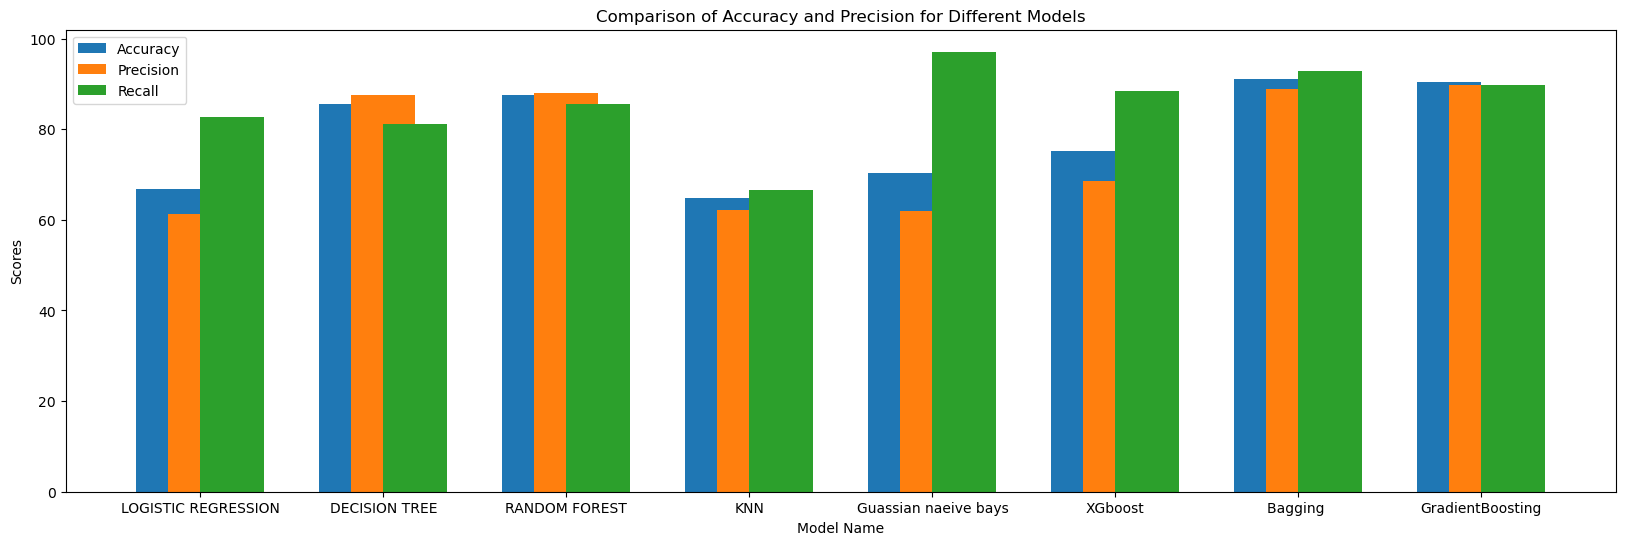

In [372]:
# Create an array for the x-axis positions
df3['Accuracy']=df3['Accuracy']*100
df3['Precision']=df3['Precision']*100
df3['Recall']=df3['Recall']*100
x = np.arange(len(df3))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df3['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x , df3['Precision'], width=bar_width, label='Precision')
plt.bar(x + bar_width/2, df3['Recall'], width=bar_width, label='Recall')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy and Precision for Different Models')
plt.xticks(x, df3['Model Name'])
plt.legend()

# Display the plot
plt.show()

# Comparison of Accuracy

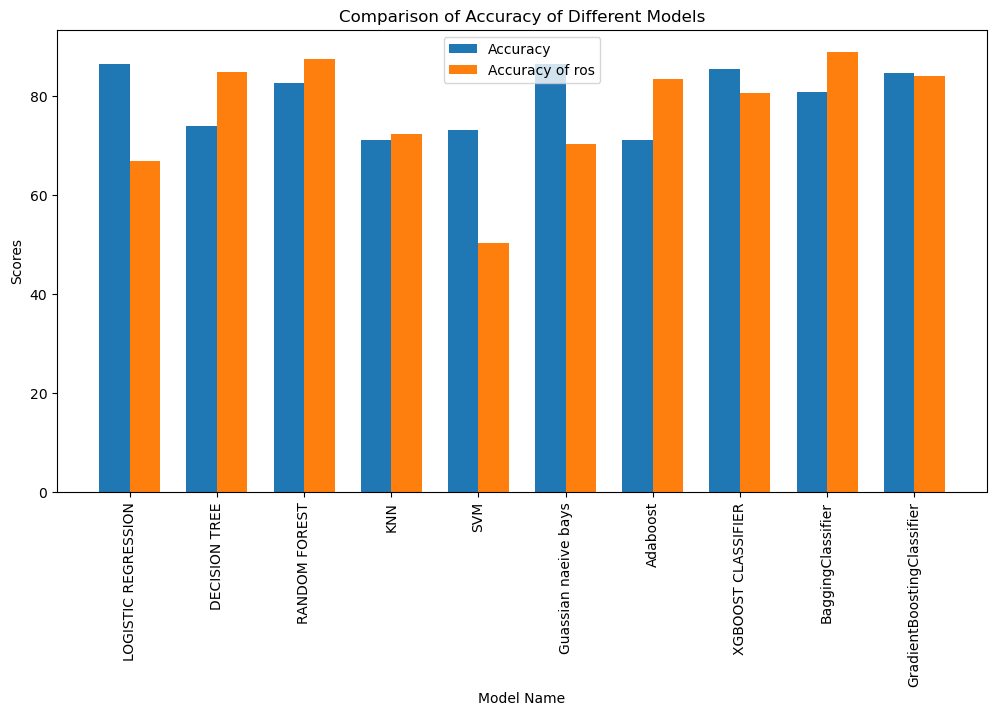

In [416]:
# Create an array for the x-axis positions
df['Accuracy']=df['Accuracy']
df1['Accuracy']=df1['Accuracy']
x = np.arange(len(df))
#to increase figure size
plt.figure(figsize=(12, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x + bar_width/2, df1['Accuracy'], width=bar_width, label='Accuracy of ros')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy of Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

# Comparison of Precision

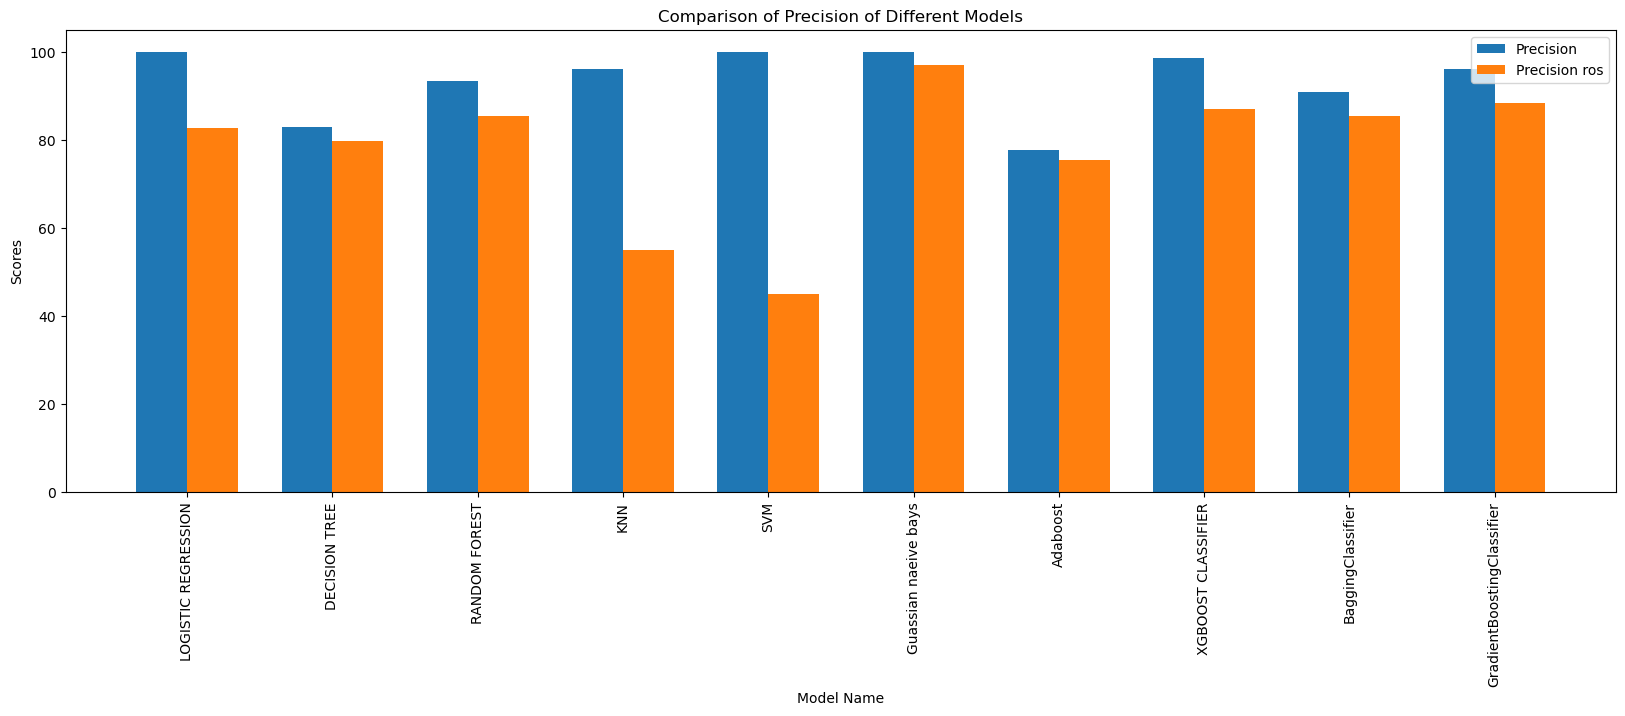

In [422]:
# Create an array for the x-axis positions
df['Precision']=df['Precision']*100
df1['Precision']=df1['Precision']*100
x = np.arange(len(df1))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Precision'], width=bar_width, label='Precision')
plt.bar(x + bar_width/2, df1['Precision'], width=bar_width, label='Precision ros')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Precision of Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

# Comparison of Recall

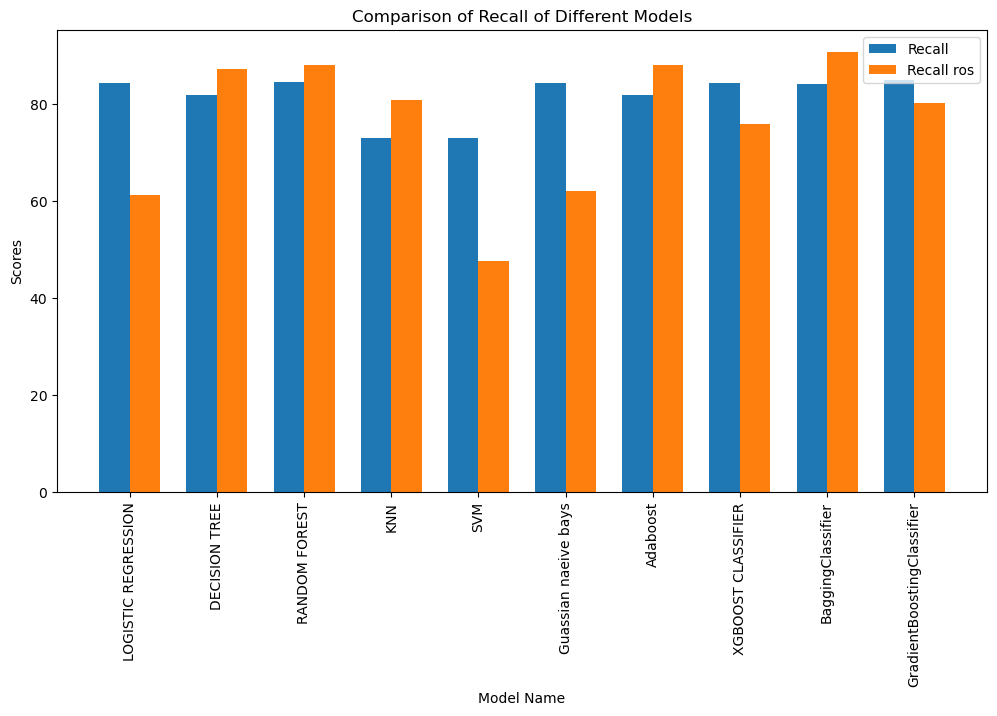

In [423]:
# Create an array for the x-axis positions
df['Recall']=df['Recall']*100
df1['Recall']=df1['Recall']*100
x = np.arange(len(df))
#to increase figure size
plt.figure(figsize=(12, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Recall'], width=bar_width, label='Recall')
plt.bar(x + bar_width/2, df1['Recall'], width=bar_width, label='Recall ros')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Recall of Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

# DataFrame RandomOverSampling

In [427]:
list11=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","Guassian naeive bays","XGboost","Bagging ","GradientBoosting"]
list12=[lg_acc1,dt_acc1,rf_acc1,kacc,acc_nb1,xgb_acc1,bg_acc1,gb_acc1]
list13=[lg_pre1,dt_pre1,rf_pr1,k_pr1,pre_nb1,xgb_pre1,bg_pre1,gb_pre1]
list14=[lg_re1,dt_re1,rf_re1,k_re1,re_nb1,xgb_re1,bg_re1,gb_re1]
list15=[lg_fc1,dt_fc1,rf_fc1,k_fc1,fc_nb1,xgb_fc1,bg_fc1,gb_fc1]

In [428]:
df4=pd.DataFrame({"Model Name":list11,"Accuracy":list12,"Precision":list13,"Recall":list14,"F1 score":list15})
df4

,Model Name,Accuracy,Precision,Recall,F1 score
0,LOGISTIC REGRESSION,66.896552,0.826087,0.612903,0.703704
1,DECISION TREE,84.827586,0.797101,0.873016,0.833333
2,RANDOM FOREST,87.586207,0.855072,0.880597,0.867647
3,KNN,71.153846,0.550725,0.808511,0.655172
4,Guassian naeive bays,70.344828,0.971014,0.620370,0.757062
5,XGboost,80.689655,0.869565,0.759494,0.810811
6,Bagging,88.965517,0.855072,0.907692,0.880597
7,GradientBoosting,84.137931,0.884058,0.802632,0.841379


# Comparison of Accuracy of RandomOverSampling vs GRIDSEARCHCV')

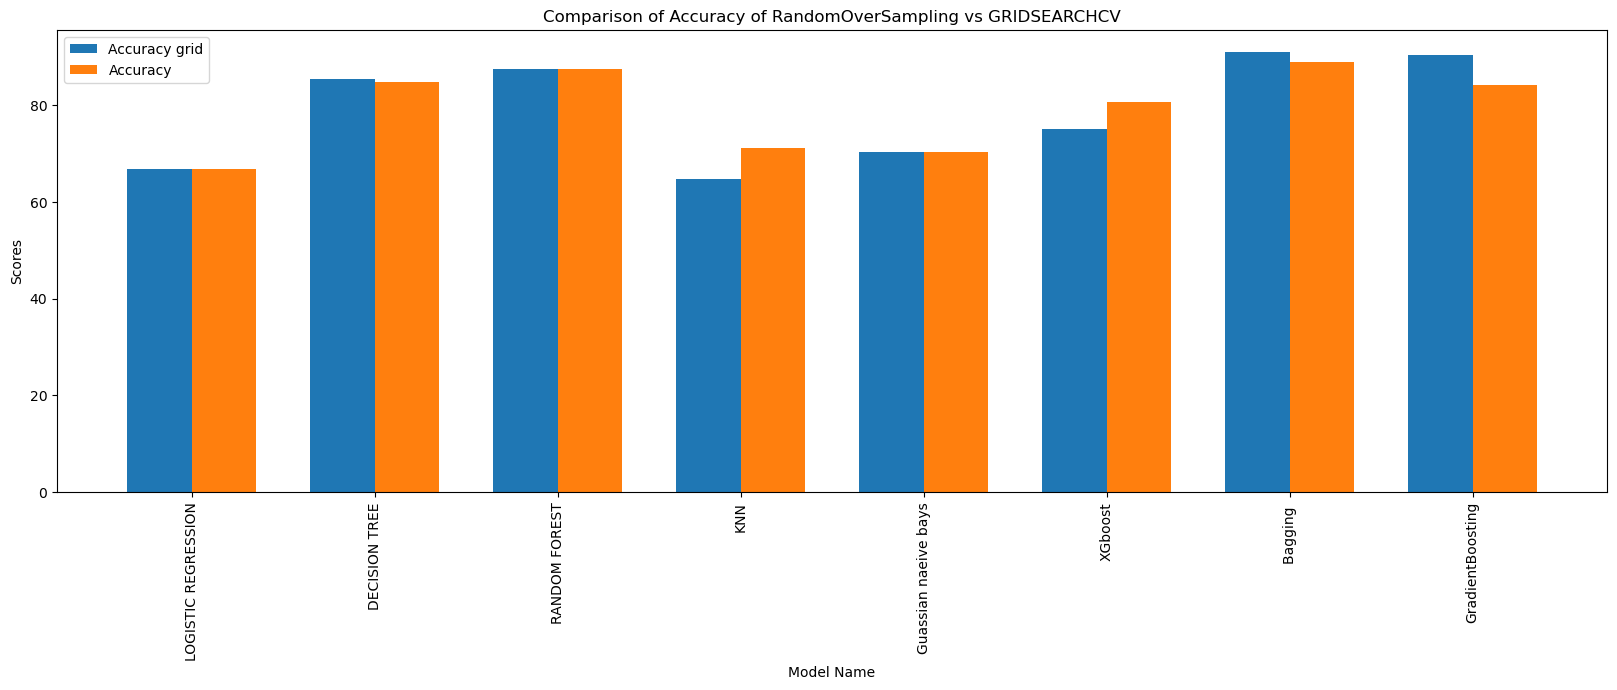

In [424]:
# Create an array for the x-axis positions
df3['Accuracy']=df3['Accuracy']
df4['Accuracy']=df4['Accuracy']
x = np.arange(len(df4))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df3['Accuracy'], width=bar_width, label='Accuracy grid')
plt.bar(x + bar_width/2, df4['Accuracy'], width=bar_width, label='Accuracy')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy of RandomOverSampling vs GRIDSEARCHCV')
plt.xticks(x, df4['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

# Comparison of Precision of RandomOverSampling vs GRIDSEARCHCV

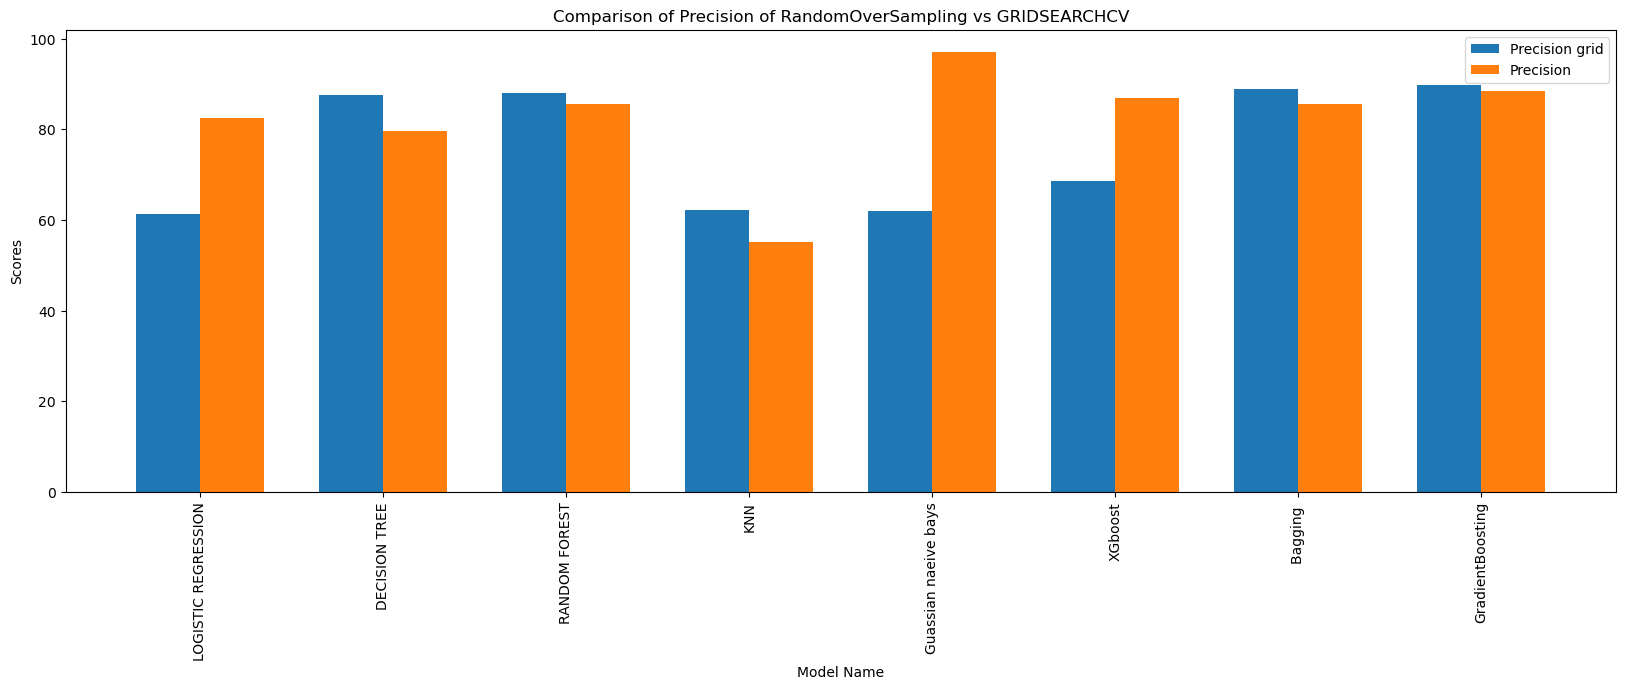

In [429]:
# Create an array for the x-axis positions
df3['Precision']=df3['Precision']*100
df4['Precision']=df4['Precision']*100
x = np.arange(len(df4))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df3['Precision'], width=bar_width, label='Precision grid')
plt.bar(x + bar_width/2, df4['Precision'], width=bar_width, label='Precision')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Precision of RandomOverSampling vs GRIDSEARCHCV')
plt.xticks(x, df4['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

# Comparison of Recall of RandomOverSampling vs GRIDSEARCHCV

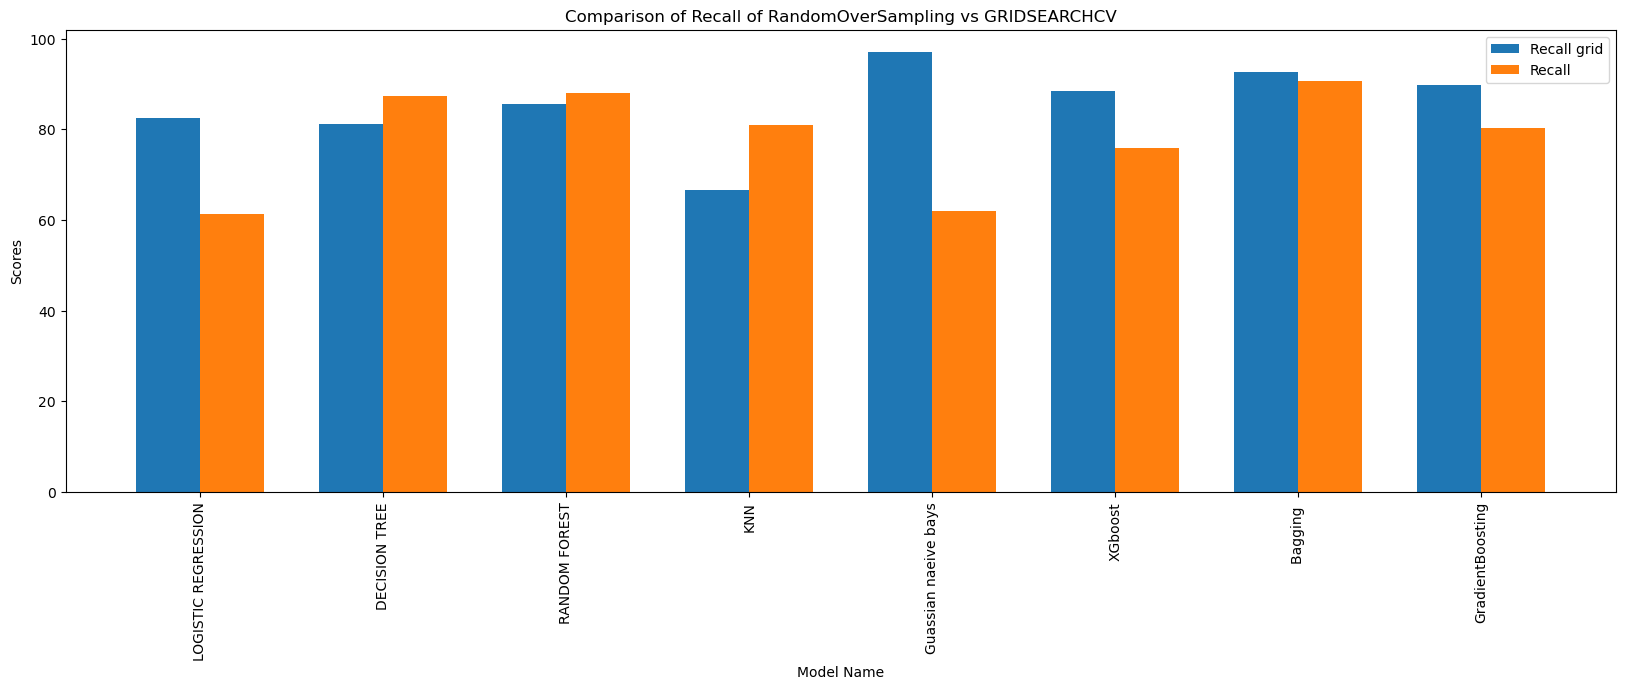

In [430]:
# Create an array for the x-axis positions
df3['Recall']=df3['Recall']*100
df4['Recall']=df4['Recall']*100
x = np.arange(len(df4))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df3['Recall'], width=bar_width, label='Recall grid')
plt.bar(x + bar_width/2, df4['Recall'], width=bar_width, label='Recall')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Recall of RandomOverSampling vs GRIDSEARCHCV')
plt.xticks(x, df4['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()